In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('ridership.csv')

In [ ]:
df.columns

Index(['service_date', 'mode', 'route_or_line',
       'total_monthly_weekday_ridership', 'average_monthly_weekday_ridersh',
       'countofdates_weekday', 'total_monthly_ridership',
       'average_monthly_ridership', 'countofdates', 'ObjectId'],
      dtype='object')

In [ ]:
fuel = pd.read_csv('fuel.csv')

In [ ]:
fuel.head()

,Year,Mode,Type_of_Service,Fuel_Source,Units,Volume,Miles_Traveled,Efficiency,ObjectId
0,2016,CR,PT,Bio-Diesel,gal,0.0,0.0,0.000,1
1,2016,CR,PT,Compressed Natural Gas,gal,0.0,0.0,0.000,2
2,2016,CR,PT,Diesel,gal,12704208.0,8486922.0,0.668,3
3,2016,CR,PT,Electric Battery,kwh,0.0,0.0,0.000,4
4,2016,CR,PT,Electric Propulsion,kwh,0.0,0.0,0.000,5


In [ ]:
fuel['Mode'].unique()

array(['CR', 'DR', 'FB', 'HR', 'LR', 'MB', 'RB', 'TB'], dtype=object)

In [ ]:
fuel['Type_of_Service'].unique()

array(['PT', 'DO'], dtype=object)

In [ ]:
season = pd.read_csv('season.csv')

<ipython-input-11-003d882b1b74>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  season = pd.read_csv('season.csv')


In [ ]:
season.columns

Index(['ObjectId', 'season', 'route_id', 'route_variant', 'direction_id',
       'trip_start_time', 'day_type_id', 'day_type_name', 'stop_name',
       'stop_id', 'stop_sequence', 'boardings', 'alightings', 'load_',
       'sample_size'],
      dtype='object')

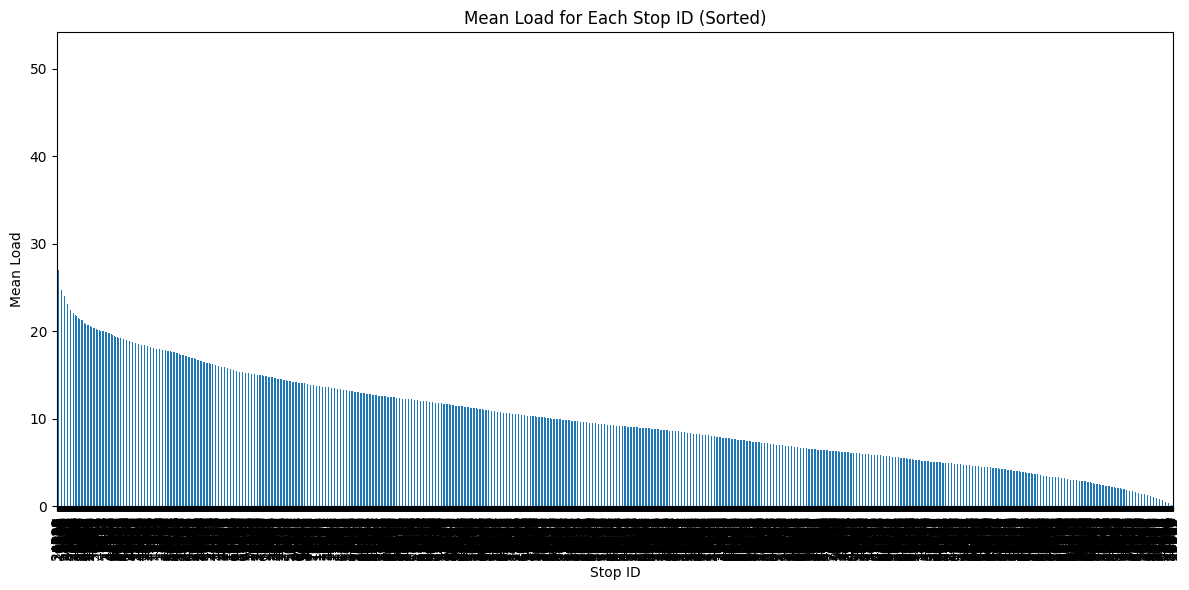

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'season' is your DataFrame

# Grouping data by 'stop_id' and calculating mean load for each stop
stop_mean_load = season.groupby('stop_id')['load_'].mean()

# Sorting the data by mean load in descending order
stop_mean_load_sorted = stop_mean_load.sort_values(ascending=False)




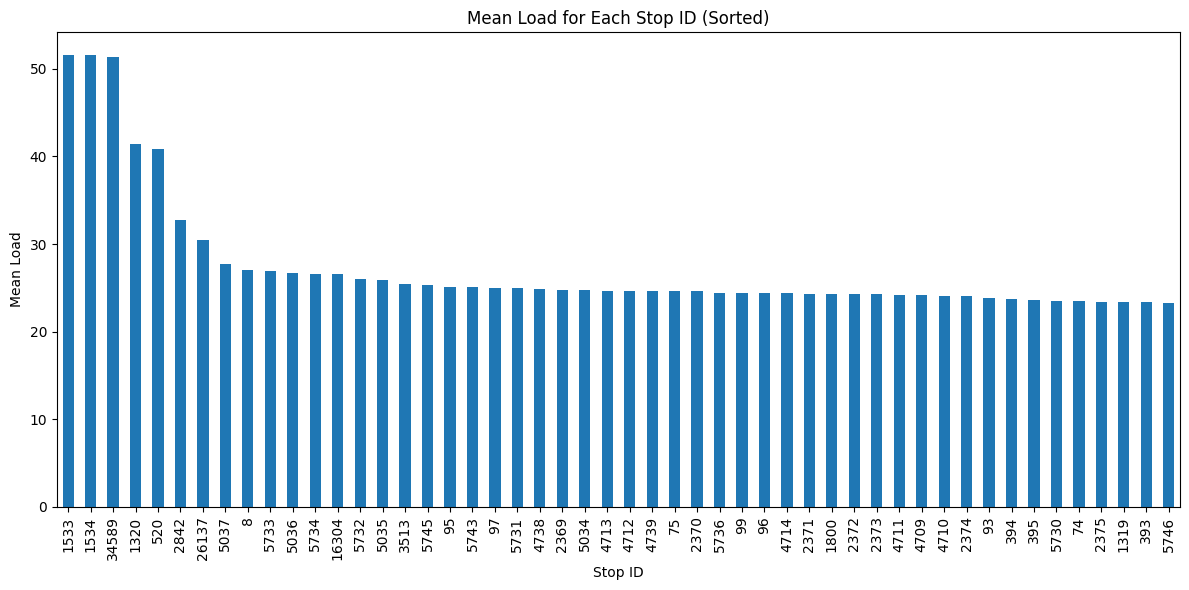

In [ ]:
# Plotting the mean load values for each stop_id
plt.figure(figsize=(12, 6))
stop_mean_load_sorted[:50].plot(kind='bar')
plt.xlabel('Stop ID')
plt.ylabel('Mean Load')
plt.title('Mean Load for Each Stop ID (Sorted)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()

plt.show()

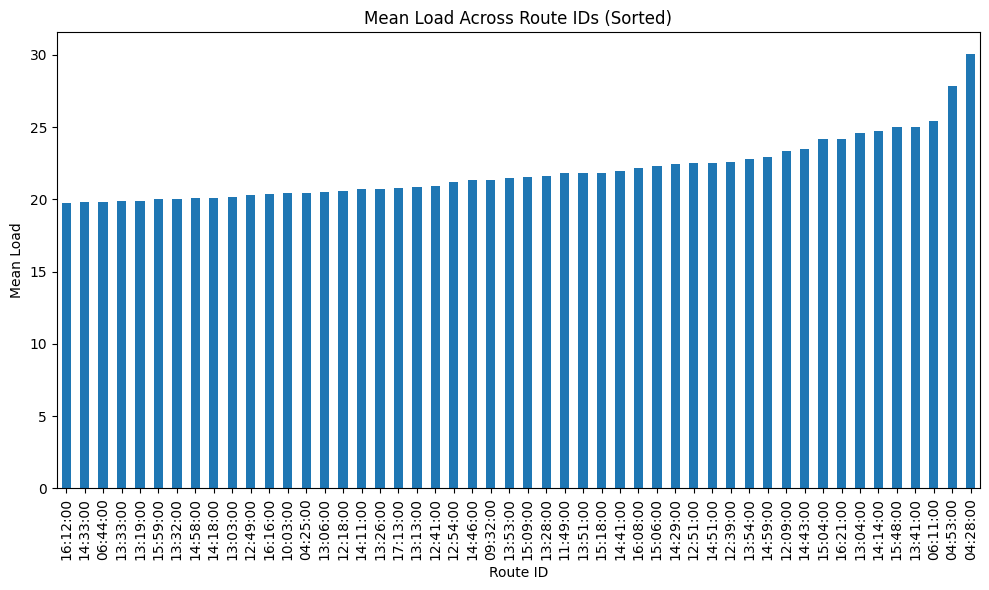

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'season' is your DataFrame
grouped_data = season.groupby('trip_start_time')['load_'].mean()
sorted_data = grouped_data.sort_values()

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_data[-50:].plot(kind='bar')
plt.xlabel('Route ID')
plt.ylabel('Mean Load')
plt.title('Mean Load Across Route IDs (Sorted)')
plt.tight_layout()

plt.show()


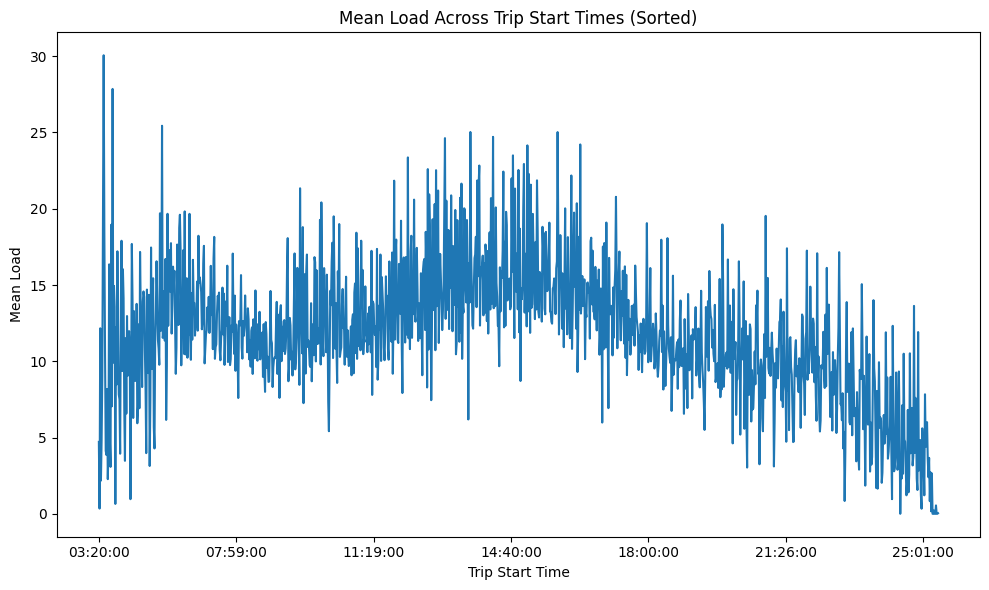

In [ ]:
grouped_data = season.groupby('trip_start_time')['load_'].mean()

# Sort the grouped data by 'trip_start_time'
sorted_data = grouped_data.sort_index()

# Plotting the sorted data
plt.figure(figsize=(10, 6))
sorted_data.plot(kind='line', linestyle='-')
plt.xlabel('Trip Start Time')
plt.ylabel('Mean Load')
plt.title('Mean Load Across Trip Start Times (Sorted)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()

plt.show()

In [ ]:
season.trip_start_time.max()

'25:35:00'

In [ ]:
fuel.columns

Index(['Year', 'Mode', 'Type_of_Service', 'Fuel_Source', 'Units', 'Volume',
       'Miles_Traveled', 'Efficiency', 'ObjectId'],
      dtype='object')

In [ ]:
fuel = fuel[fuel['Mode']=='MB']

In [ ]:
fuel

,Year,Mode,Type_of_Service,Fuel_Source,Units,Volume,Miles_Traveled,Efficiency,ObjectId
40,2016,MB,DO,Bio-Diesel,gal,0.0,0.0,0.0000,41
41,2016,MB,DO,Compressed Natural Gas,gal,4144102.0,7801279.0,NaN,42
42,2016,MB,DO,Diesel,gal,5105648.0,17030651.0,3.3356,43
43,2016,MB,DO,Electric Battery,kwh,0.0,0.0,0.0000,44
44,2016,MB,DO,Electric Propulsion,kwh,0.0,0.0,0.0000,45
...,...,...,...,...,...,...,...,...,...
267,2019,MB,PT,Electric Battery,kwh,0.0,0.0,0.0000,268
268,2019,MB,PT,Electric Propulsion,kwh,0.0,0.0,0.0000,269
269,2019,MB,PT,Gasoline,gal,33865.0,102417.0,3.0243,270
270,2019,MB,PT,Liquefied Petroleum Gas,gal,0.0,0.0,0.0000,271


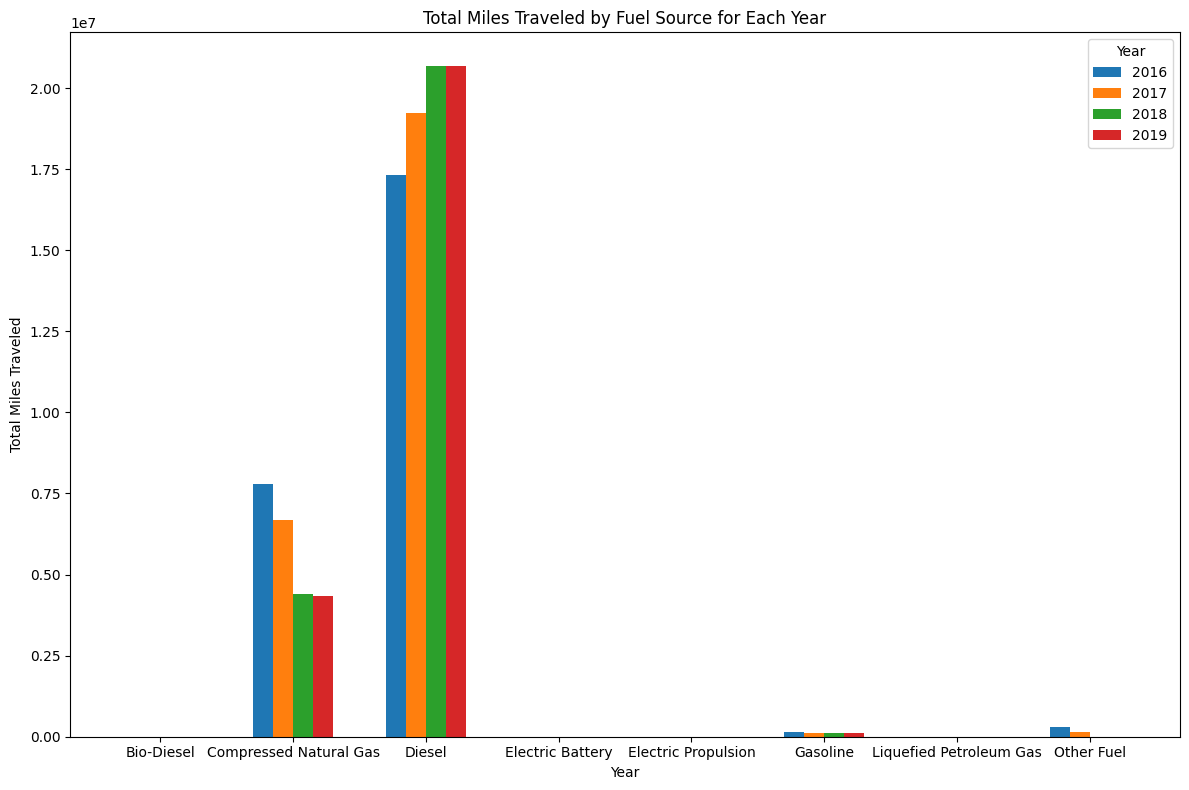

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the provided dataset

# Grouping data by 'Year' and 'Fuel_Source', summing 'Miles_Traveled'
grouped_data = fuel.groupby(['Year', 'Fuel_Source'])['Miles_Traveled'].sum().reset_index()

# Pivot the data to have 'Fuel_Source' as columns, 'Year' as index
pivot_data = grouped_data.pivot(index='Year', columns='Fuel_Source', values='Miles_Traveled').fillna(0)

# Plotting the combined bar plot for each year
plt.figure(figsize=(12, 8))

for idx, year in enumerate(pivot_data.index):
    plt.bar([x + idx * 0.15 for x in range(len(pivot_data.columns))], pivot_data.loc[year], width=0.15, label=str(year))

plt.xlabel('Year')
plt.ylabel('Total Miles Traveled')
plt.title('Total Miles Traveled by Fuel Source for Each Year')
plt.xticks([x + 0.15 * (len(pivot_data.index) - 1) / 2 for x in range(len(pivot_data.columns))], pivot_data.columns)
plt.legend(title='Year')
plt.tight_layout()

plt.show()
